# Self Organizing Map

In [1]:
!pip install MiniSom

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

### Read and Feature Scale the Data

In [3]:
dataset = pd.read_csv("./som/credit_card_applications.csv")

In [4]:
scaler = MinMaxScaler(feature_range= (0,1))
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
X = scaler.fit_transform(X)

### Training the SOM

In [5]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [6]:
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

### Visualizing the Resuls

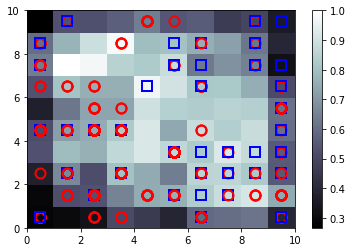

In [7]:
try:
    bone()
    pcolor(som.distance_map().T)
    colorbar()
    markers = ['o', 's']
    colors = ['r','b']
    for i, x in enumerate(X):
        winner = som.winner(x)
        plot(
            winner[0] + 0.5,
            winner[1] + 0.5,
            markers[Y[i]],
            markeredgecolor = colors[Y[i]],
            markerfacecolor = 'None',
            markersize = 10,
            markeredgewidth = 2)
    show()
except ValueError as e:
    print(e)

### Searching for frauds

In [8]:
mappings = som.win_map(X)
mappings_tuple = (mappings[(1,1)], mappings[(2,1)])
frauds = np.concatenate(
    mappings_tuple,
    axis = 0
)
frauds = scaler.inverse_transform(frauds)

In [9]:
for customerId in frauds[:,0]:
    print("Fraud customer Id {}".format(int(customerId)))

Fraud customer Id 15663942
Fraud customer Id 15767729
Fraud customer Id 15711446
Fraud customer Id 15720529
Fraud customer Id 15787693
Fraud customer Id 15688210
Fraud customer Id 15793366
Fraud customer Id 15728906
Fraud customer Id 15793317
Fraud customer Id 15735106
Fraud customer Id 15692430
Fraud customer Id 15683276
Fraud customer Id 15652289
Fraud customer Id 15768777
Fraud customer Id 15791326
Fraud customer Id 15643574
Fraud customer Id 15779586
Fraud customer Id 15730150
Fraud customer Id 15692408
Fraud customer Id 15694530
Fraud customer Id 15596797
Fraud customer Id 15667451
Fraud customer Id 15600975
Fraud customer Id 15704509
Fraud customer Id 15592914
Fraud customer Id 15623668
Fraud customer Id 15708236
Fraud customer Id 15686670
Fraud customer Id 15617065
Fraud customer Id 15624850
Fraud customer Id 15688059
Fraud customer Id 15646521
Fraud customer Id 15660263
Fraud customer Id 15615176
Fraud customer Id 15656417
Fraud customer Id 15748691
Fraud customer Id 15615670
F